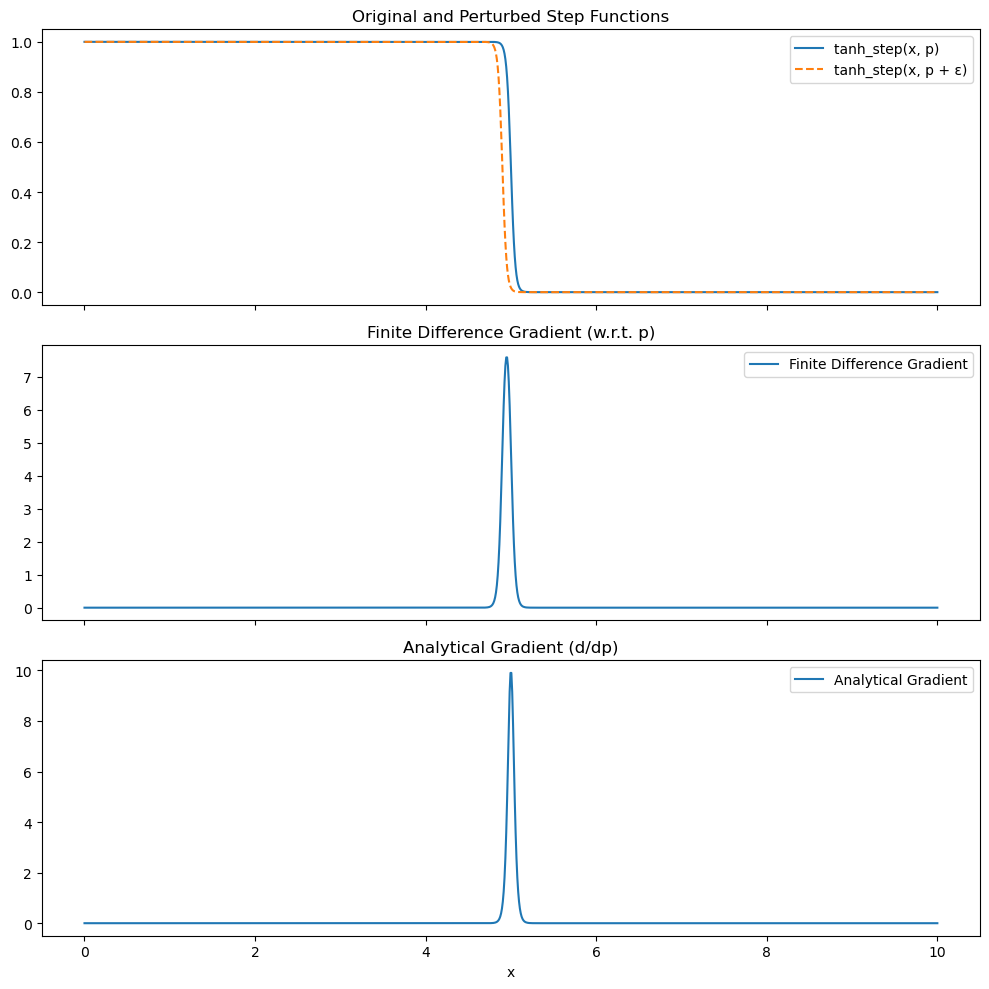

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
x = np.linspace(0, 10, 1000)

# Hyperbolic tangent transition function
def tanh_step(x, p, temperature=0.05):
    """Smooth step function with transition centered at p"""
    return 0.5 * (1 - np.tanh((x - p) / temperature))

# Parameters
p = 5.0
epsilon = 1e-1
temperature = 0.05

# Original and perturbed functions
f = tanh_step(x, p, temperature)
f_perturbed = tanh_step(x, p + epsilon, temperature)

# Finite difference gradient
finite_diff_grad = (f_perturbed - f) / epsilon

# Analytical gradient: d/dp of tanh_step
def tanh_step_grad(x, p, temperature=0.05):
    """Analytical derivative with respect to p"""
    z = (x - p) / temperature
    return 0.5 * (1 - np.tanh(z)**2) * (1 / temperature)

analytic_grad = tanh_step_grad(x, p, temperature)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(x, f, label='tanh_step(x, p)')
axs[0].plot(x, f_perturbed, label='tanh_step(x, p + ε)', linestyle='--')
axs[0].set_title('Original and Perturbed Step Functions')
axs[0].legend()

axs[1].plot(x, finite_diff_grad, label='Finite Difference Gradient')
axs[1].set_title('Finite Difference Gradient (w.r.t. p)')
axs[1].legend()

axs[2].plot(x, analytic_grad, label='Analytical Gradient')
axs[2].set_title('Analytical Gradient (d/dp)')
axs[2].legend()

plt.xlabel('x')
plt.tight_layout()
plt.show()


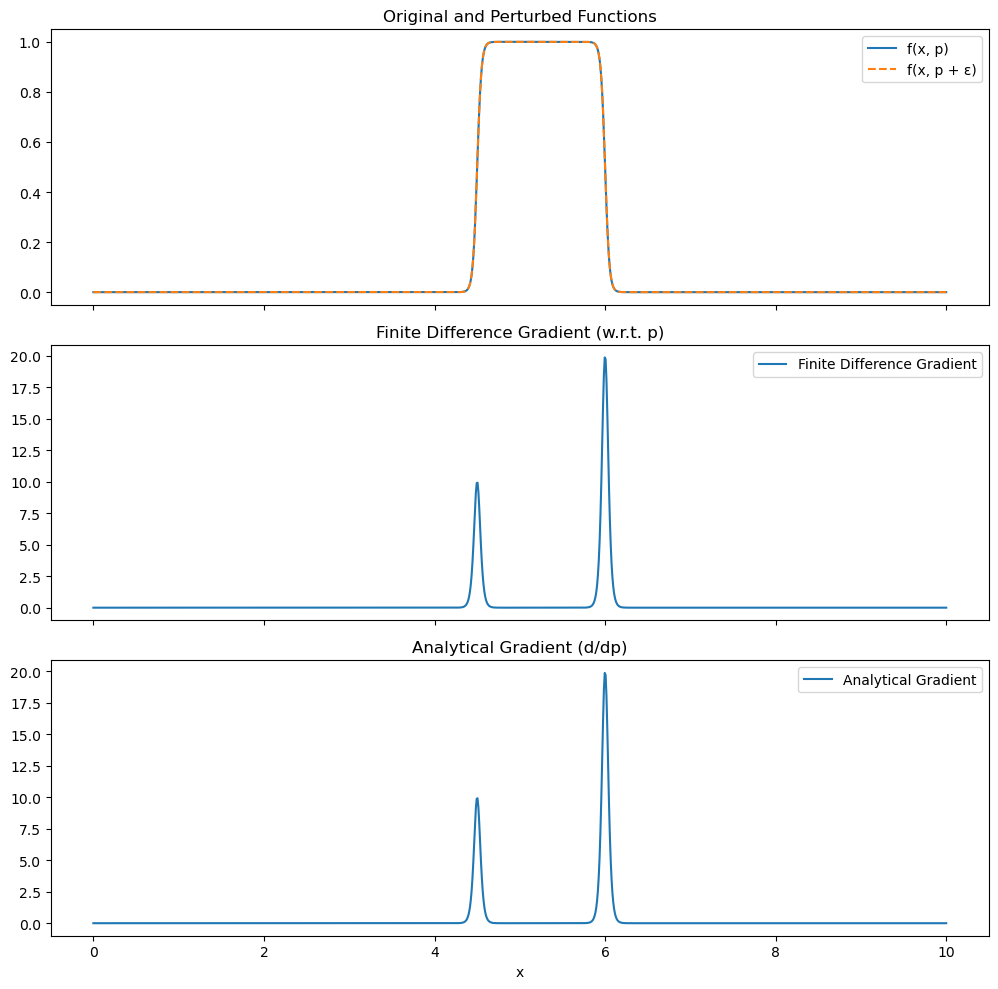

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

# Convert x to JAX array for compatibility
x = jnp.linspace(0, 10, 1000)

# Asymmetric double tanh step
def double_tanh_step_asymmetric(p, x, A=5.0, temperature=0.05):
    left = 0.5 * (1 + jnp.tanh((x - (A - p)) / temperature))
    right = 0.5 * (1 - jnp.tanh((x - (A + 2 * p)) / temperature))
    return left * right

# Vectorized gradient: df/dp at each x
df_dp = jax.grad(double_tanh_step_asymmetric, argnums=0)
df_dp_vec = jax.vmap(df_dp, in_axes=(None, 0))  # vectorize over x

# Parameters
p = 0.5
epsilon = 1e-4
A = 5.0
temperature = 0.05

# Convert x back to NumPy for plotting
x_np = np.linspace(0, 10, 1000)

# Evaluate function and gradients
f = double_tanh_step_asymmetric(p, x, A, temperature)
f_perturbed = double_tanh_step_asymmetric(p + epsilon, x, A, temperature)
finite_diff_grad = (f_perturbed - f) / epsilon
analytic_grad = df_dp_vec(p, x)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].plot(x_np, np.array(f), label='f(x, p)')
axs[0].plot(x_np, np.array(f_perturbed), label='f(x, p + ε)', linestyle='--')
axs[0].set_title('Original and Perturbed Functions')
axs[0].legend()

axs[1].plot(x_np, np.array(finite_diff_grad), label='Finite Difference Gradient')
axs[1].set_title('Finite Difference Gradient (w.r.t. p)')
axs[1].legend()

axs[2].plot(x_np, np.array(analytic_grad), label='Analytical Gradient (JAX)')
axs[2].set_title('Analytical Gradient (JAX d/dp)')
axs[2].legend()

plt.xlabel('x')
plt.tight_layout()
plt.show()
